In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from scipy import stats
from scipy.optimize import fmin_tnc
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import SGDClassifier
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [ ]:
import random
from matplotlib import pylab as plt
%pylab inline

num_points = 200
m, b, delta = 1, 0, 1

X = np.linspace(1, 10, num_points)
y = m * X + b + random.uniform(-delta, delta, num_points)



Populating the interactive namespace from numpy and matplotlib


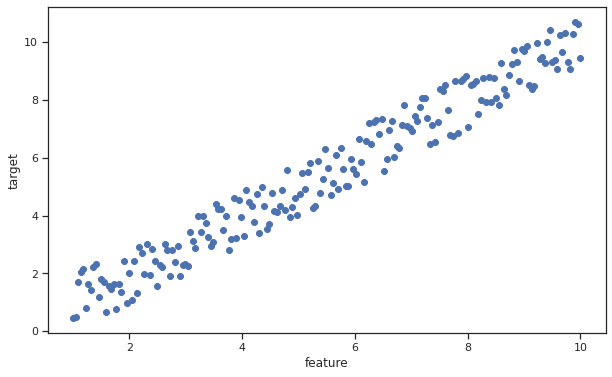

In [ ]:
fig = plt.figure(figsize=(10, 6))
plt.scatter(X, y)

plt.xlabel('feature')
plt.ylabel('target')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# splits the training and test data set in 80% : 20%
# assign random_state to any value.This ensures consistency.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
     

(160,)
(40,)
(160,)
(40,)


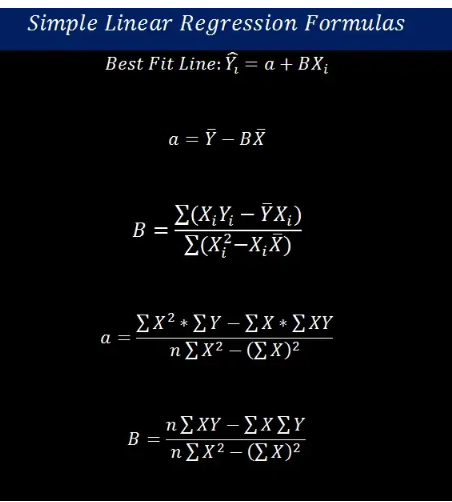

In [ ]:
def simple_linear_regression(input_feature,output):
    Xi=input_feature
    Yi=output
    
    n=len(Xi)
    
    Xi_mean=Xi.mean()
    Yi_mean=Yi.mean()
    
    S_Xi=(Xi).sum()
    S_Yi=(Yi).sum()
    
    S_XiYi=((Xi*Yi).sum())*n
    
    S_Xi_S_Yi=S_Xi*S_Yi
    
    S_XiXi=((Xi*Xi).sum())*n
    
    S_Xi_Square=S_Xi*S_Xi
    
    slope=(S_XiYi-S_Xi_S_Yi )/(S_XiXi-S_Xi_Square)
    
    intercept=Yi_mean -slope*Xi_mean
    
    return slope ,intercept

In [ ]:
actual_slope,actual_intercept=simple_linear_regression(X_train,y_train)

print("slope ",actual_slope)
print("intercept ",actual_intercept)

slope  1.0198620405226857
intercept  -0.14440875441637324


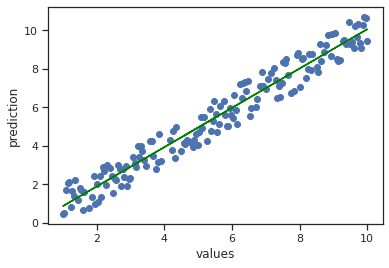

In [ ]:
plt.scatter(X_train,y_train)
plt.plot(X_train,actual_slope*X_train+actual_intercept,color="green")
plt.xlabel("values")
plt.ylabel('prediction')
plt.show()

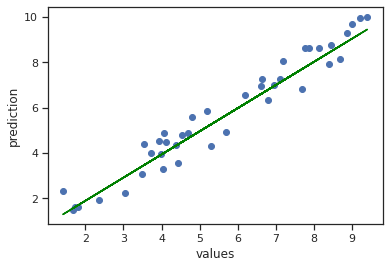

In [ ]:
plt.scatter(X_test,y_test)
plt.plot(X_test,actual_slope*X_test+actual_intercept,color="green")
plt.xlabel("values")
plt.ylabel('prediction')
plt.show()

In [ ]:
def get_regression_prediction(input_features,slope,intercept):
    predicted_values = slope*input_features + intercept
    return predicted_values

In [ ]:
y_pred=get_regression_prediction(X_test,actual_slope,actual_intercept)
y_pred1=get_regression_prediction(X_train,actual_slope,actual_intercept)

In [ ]:
A_P_data1=pd.DataFrame({"actual":y_train,"PREDICTED" :y_pred1})
print(A_P_data1.head())

      actual  PREDICTED
0   4.167825   4.519282
1  10.699941   9.961963
2   1.927229   2.628181
3   2.433720   1.982439
4   5.538356   6.502632


In [ ]:
A_P_data=pd.DataFrame({"actual":y_test,"PREDICTED" :y_pred})
print(A_P_data.head())

     actual  PREDICTED
0  4.317475   5.257273
1  1.476216   1.567319
2  1.934364   2.259186
3  8.649619   8.163111
4  6.343208   6.779378


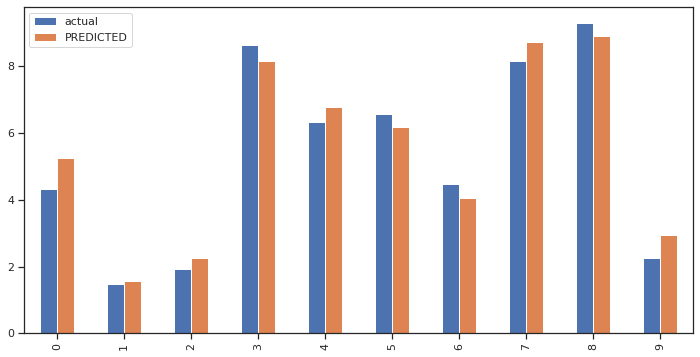

In [ ]:
A_P_data.head(10).plot(kind='bar',figsize=(12,6))
plt.show()

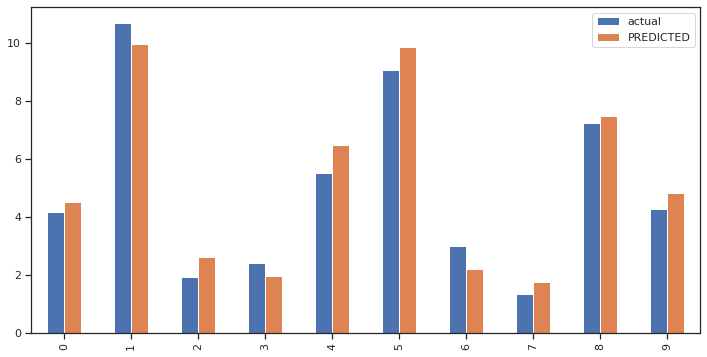

In [ ]:
A_P_data1.head(10).plot(kind='bar',figsize=(12,6))
plt.show()

https://datagy.io/mean-squared-error-python/

In [ ]:
def mse(actual, predicted):
    actual = np.array(actual)
    predicted = np.array(predicted)
    differences = np.subtract(actual, predicted)
    squared_differences = np.square(differences)
    return squared_differences.mean()

print(mse(X_train, y_train))
print(mse(X_test, y_test))

0.3671420098491079
0.35055121612161894


In [ ]:
def r2score(actual,predicted):
  r2_score=1 - (((actual - predicted) ** 2).sum() / ((actual - np.mean(actual)) ** 2).sum())
  return r2_score
print(r2_score(X_train, y_train))
print(r2_score(X_test, y_test))  

0.9487643341151784
0.9353083795697144


In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
X_train=X_train.reshape(-1,1)
regr.fit(X_train,y_train)

coefficients=regr.coef_
intercept=regr.intercept_

print("slope:  " ,coefficients[0])

print("intercept: ", intercept)

slope:   1.0198620405226861
intercept:  -0.1444087544163759


In [ ]:
from sklearn.metrics import r2_score
R = r2_score(y_test , y_pred)
print ("R² :",R)

R² : 0.9440860799062266


Для аналитического восстановления зависимости можно использовать следующие формулы (которые выводятся на основе рассматриваемого далее метода наименьших квадратов).

Пусть 
 
 - среднее значение для x, а 
 - среднее значение для y.

Тогда для средних значений рассматриваемой выборки:



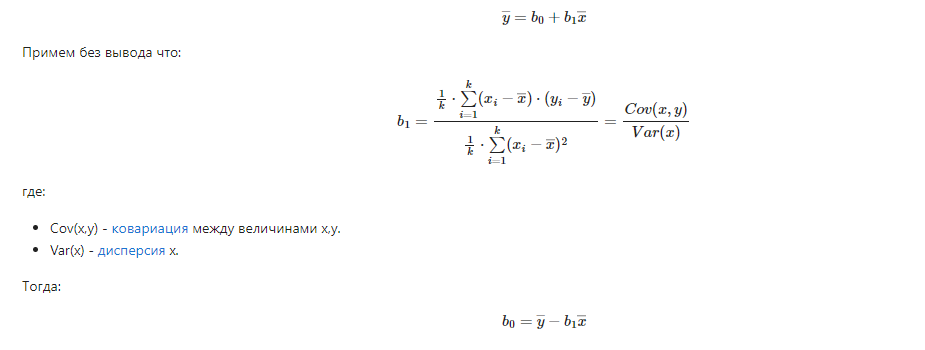

In [ ]:
def regr_coef(x_array : np.ndarray, 
                       y_array : np.ndarray) -> Tuple[float, float]:
    x_mean = np.mean(x_array)
    y_mean = np.mean(y_array)
    var1 = np.sum([(x-x_mean)**2 for x in x_array])
    cov1 = np.sum([(x-x_mean)*(y-y_mean) for x, y in zip(x_array, y_array)])
    b1 = cov1 / var1
    b0 = y_mean - b1*x_mean
    return b0, b1

In [ ]:
b0, b1 = regr_coef(X, y)
b0, b1

(-0.14020698186102454, 1.0249428019689402)

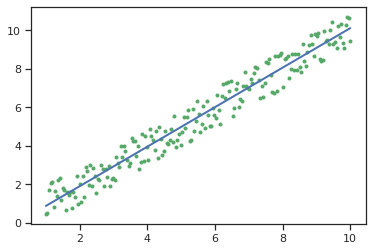

In [ ]:
def y_regr(x_array : np.ndarray, b0: float, b1: float) -> np.ndarray:
    res = [b1*x+b0 for x in x_array]
    return res
y_array_regr = y_regr(X, b0, b1)
plt.plot(X, y, 'g.')
plt.plot(X, y_array_regr, 'b', linewidth=2.0)
plt.show()

In [ ]:
# Простейшая реализация градиентного спуска
def gradient_descent(x_array : np.ndarray,
                     y_array : np.ndarray,
                     b0_0 : float,
                     b1_0 : float,
                     epochs : int,
                     learning_rate : float = 0.001
                    ) -> Tuple[float, float]:
    # Значения для коэффициентов по умолчанию
    b0, b1 = b0_0, b1_0
    k = float(len(x_array))
    for i in range(epochs): 
        # Вычисление новых предсказанных значений
        # используется векторизованное умножение и сложение для вектора и константы
        y_pred = b1 * x_array + b0
        # Расчет градиентов
        # np.multiply - поэлементное умножение векторов
        dL_db1 = (-2/k) * np.sum(np.multiply(x_array, (y_array - y_pred)))
        dL_db0 = (-2/k) * np.sum(y_array - y_pred)
        # Изменение значений коэффициентов:
        b1 = b1 - learning_rate * dL_db1
        b0 = b0 - learning_rate * dL_db0
    # Результирующие значения
    y_pred = b1 * x_array + b0
    return b0, b1, y_pred
    

In [ ]:
def show_gradient_descent(epochs, b0_0, b1_0):
    grad_b0, grad_b1, grad_y_pred = gradient_descent(X, y, b0_0, b1_0, epochs)
    print('b0 = {} - (теоретический), {} - (градиентный спуск)'.format(b0, grad_b0))
    print('b1 = {} - (теоретический), {} - (градиентный спуск)'.format(b1, grad_b1))
    print('MSE = {}'.format(mean_squared_error(y_array_regr, grad_y_pred)))
    plt.plot(X, y, 'g.')
    plt.plot(X, y_array_regr, 'b', linewidth=2.0)
    plt.plot(X, grad_y_pred, 'r', linewidth=2.0)
    plt.show()

b0 = -0.14020698186102454 - (теоретический), 0.07882003023505955 - (градиентный спуск)
b1 = 1.0249428019689402 - (теоретический), 0.5356987867458978 - (градиентный спуск)
MSE = 7.7417857367877945


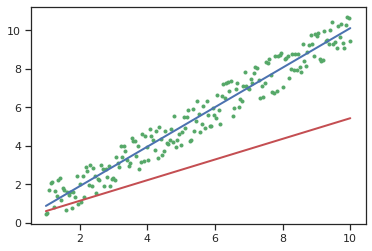

In [ ]:
show_gradient_descent(10, 0, 0)

b0 = -0.14020698186102454 - (теоретический), -0.09281399536266972 - (градиентный спуск)
b1 = 1.0249428019689402 - (теоретический), 1.0178764879233484 - (градиентный спуск)
MSE = 0.00041316496719398207


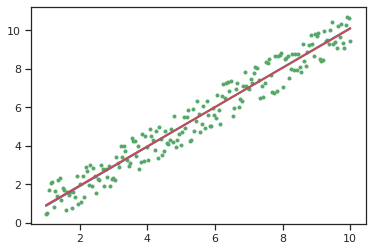

In [ ]:
show_gradient_descent(5000, 0, 0)

b0 = -0.14020698186102454 - (теоретический), -20.924959658096835 - (градиентный спуск)
b1 = 1.0249428019689402 - (теоретический), 4.123958091400844 - (градиентный спуск)
MSE = 79.46667801424532


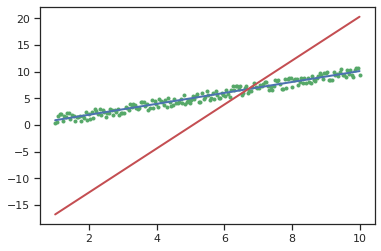

In [ ]:
# Сходимость алгоритма может сильно зависеть от начальных значений
show_gradient_descent(1000, -30, 5)

In [ ]:
# Обучим линейную регрессию и сравним коэффициенты с рассчитанными ранее
reg1 = LinearRegression().fit(X.reshape(-1, 1), y.reshape(-1, 1))
(b1, reg1.coef_), (b0, reg1.intercept_)

((1.0249428019689402, array([[1.0249428]])),
 (-0.14020698186102454, array([-0.14020698])))

In [ ]:
import random
def initialize(dim):
    
    b=random.random()
    theta=np.random.rand(dim)
    return b,theta
b,theta=initialize(1)
print('Bias: ',b,'Weights: ',theta)

Bias:  0.41840199551202284 Weights:  [0.8452967]


In [ ]:
def predict_Y(b,theta,X):
    return b + np.dot(X,theta)
def update_theta(x,y,y_hat,b_0,theta_o,learning_rate):
    db=(np.sum(y_hat-y)*2)/len(y)
    dw=(np.dot((y_hat-y),x)*2)/len(y)
    b_1=b_0-learning_rate*db
    theta_1=theta_o-learning_rate*dw
    return b_1,theta_1
import math
def get_cost(Y,Y_hat):
    Y_resd=Y-Y_hat
    return np.sum(np.dot(Y_resd.T,Y_resd))/len(Y-Y_resd)       

In [ ]:
X_shape=1

In [ ]:
def run_gradient_descent(X,
                         Y,
                         alpha=0.01,
                         num_iterations=100):
  b,theta=initialize(X_shape)
  iter_num=0
  gd_iterations_df=pd.DataFrame(columns=['iteration','cost'])
  result_idx=0

  for each_iter in range(num_iterations):
    Y_hat=predict_Y(b,theta[0],X)
    this_cost=get_cost(Y,Y_hat)
    prev_b=b
    prev_theta=theta
    b,theta=update_theta(X,Y,Y_hat,prev_b,prev_theta,alpha)

    if(iter_num%10==0):
      gd_iterations_df.loc[result_idx]=[iter_num,this_cost]
      result_idx=result_idx+1
    iter_num +=1
  print("Final Estimate of b and theta : ",b,theta)

  return gd_iterations_df,b,theta


In [ ]:
gd_iterations_df,b,theta=run_gradient_descent(X,y,alpha=0.001,num_iterations=200)


Final Estimate of b and theta :  0.056729067493279106 [0.99557955]


In [ ]:
b,theta

(0.056729067493279106, array([0.99557955]))

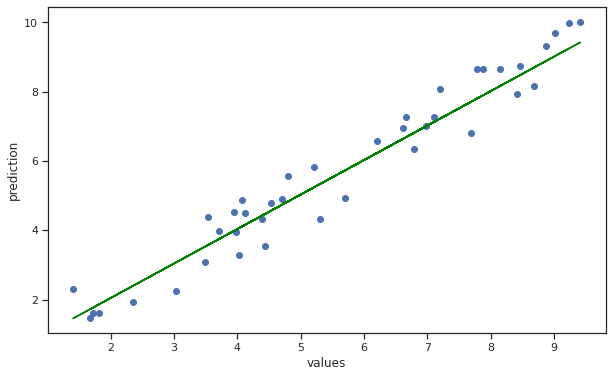

In [ ]:
fig = plt.figure(figsize=(10, 6))
plt.scatter(X_test,y_test)
plt.plot(X_test,theta*X_test+b,color="green")
plt.xlabel("values")
plt.ylabel('prediction')
plt.show()

Final Estimate of b and theta :  0.8754544380454007 [0.81535775]


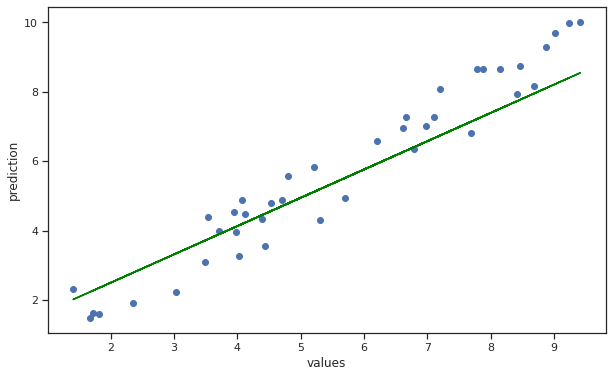

In [ ]:
gd_iterations_df,b,theta=run_gradient_descent(X,y,alpha=0.001,num_iterations=20)
fig = plt.figure(figsize=(10, 6))
plt.scatter(X_test,y_test)
plt.plot(X_test,theta*X_test+b,color="green")
plt.xlabel("values")
plt.ylabel('prediction')
plt.show()

Final Estimate of b and theta :  0.50921981409786 [0.64262215]


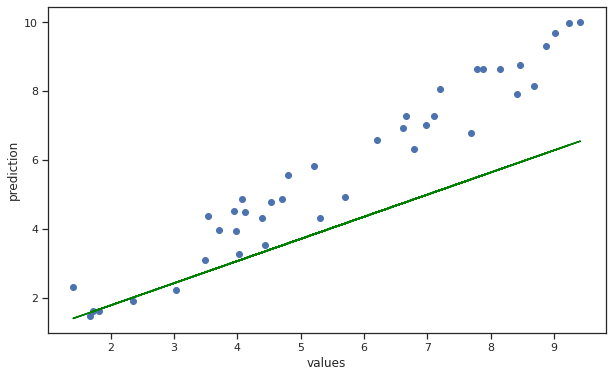

In [ ]:
gd_iterations_df,b,theta=run_gradient_descent(X,y,alpha=0.001,num_iterations=5)
fig = plt.figure(figsize=(10, 6))
plt.scatter(X_test,y_test)
plt.plot(X_test,theta*X_test+b,color="green")
plt.xlabel("values")
plt.ylabel('prediction')
plt.show()

In [ ]:
gd_iterations_df,b,theta=run_gradient_descent(X,y,alpha=0.001,num_iterations=200)

Final Estimate of b and theta :  0.9163568092724726 [0.86740868]


Text(0, 0.5, 'Cost or MSE')

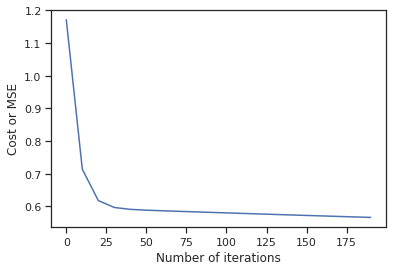

In [ ]:
%matplotlib inline
plt.plot(gd_iterations_df['iteration'],gd_iterations_df['cost'])
plt.xlabel('Number of iterations')
plt.ylabel('Cost or MSE')

In [ ]:

alpha_df_1,b,theta=run_gradient_descent(X_test,y_test,alpha=0.01,num_iterations=200)

Final Estimate of b and theta :  0.0855327070096843 [1.01355429]


In [ ]:

alpha_df_2,b,theta=run_gradient_descent(X_test,y_test,alpha=0.001,num_iterations=200)

Final Estimate of b and theta :  1.0410916375152084 [0.86705313]


Text(0.5, 1.0, 'Cost Vs. Iterations for different alpha values')

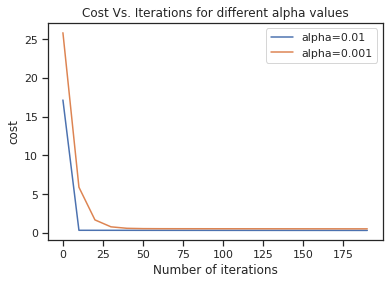

In [ ]:
plt.plot(alpha_df_1['iteration'],alpha_df_1['cost'],label="alpha=0.01")
plt.plot(alpha_df_2['iteration'],alpha_df_2['cost'],label="alpha=0.001")
plt.legend()
plt.ylabel('cost')
plt.xlabel('Number of iterations')
plt.title('Cost Vs. Iterations for different alpha values')
     

In [ ]:
rng = np.random.RandomState(0)

n_sample = 100
data_max, data_min = 1.4, -1.4
len_data = (data_max - data_min)
# sort the data to make plotting easier later
data = np.sort(rng.rand(n_sample) * len_data - len_data / 2)
noise = rng.randn(n_sample) * .3
target = data ** 3 - 0.5 * data ** 2 + noise

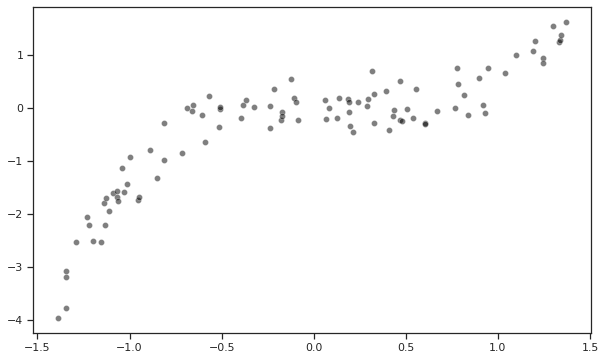

In [ ]:
fig = plt.figure(figsize=(10, 6))
sns.scatterplot( x=data, y=target,color="black", alpha=0.5)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state=42)
X_train=X_train.reshape(-1,1)
X_test=X_test.reshape(-1,1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(80, 1)
(20, 1)
(80,)
(20,)


In [ ]:
regr = linear_model.LinearRegression()
X_train=X_train.reshape(-1,1)
regr.fit(X_train,y_train)

coefficients=regr.coef_
intercept=regr.intercept_

print("slope:  " ,coefficients[0])

print("intercept: ", intercept)

slope:   1.160826680831182
intercept:  -0.27566756430799894


In [ ]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

y_train_predicted = linear_regression.predict(X_train)
y_test_predicted = linear_regression.predict(X_test)

linear_regression.coef_,linear_regression.intercept_


(array([1.16082668]), -0.27566756430799894)

In [ ]:

rmse = (np.sqrt(mean_squared_error(y_train, y_train_predicted)))
r2 = r2_score(y_train, y_train_predicted)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")


The model performance for training set
--------------------------------------
RMSE is 0.5599346630771771
R2 score is 0.7389228941637777




In [ ]:
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predicted)))
r2 = r2_score(y_test, y_test_predicted)

print("The model performance for test set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for test set
--------------------------------------
RMSE is 0.7512521318344403
R2 score is 0.6162617571530845




переобучение 

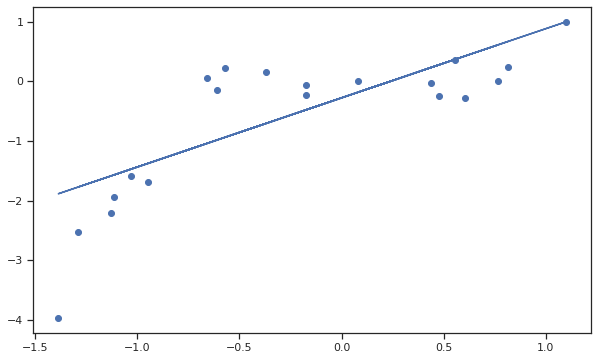

In [ ]:
fig = plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test)
plt.plot(X_test,y_test_predicted)

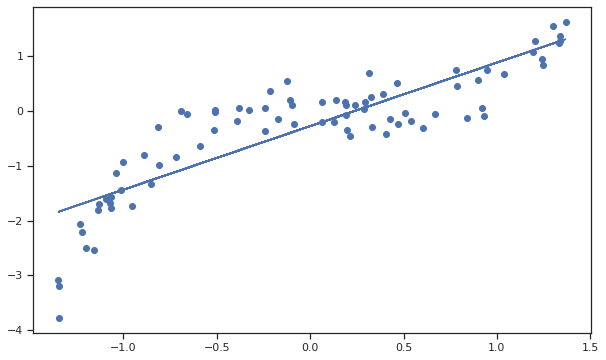

In [ ]:
fig = plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train)
plt.plot(X_train,y_train_predicted)

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet


from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import SGDRegressor

Пердполагает, что обучение на каждом шаге (эпохе) происходит не на полном наборе данных а на одном случайно выбранном примере. В случае большой обучающей выборки такой подход может многократно ускорить обучение.

В соответствии с рекомендуемыми методами scikit-learn стохастический градиентный спуск рекомендуется использовать для задачи регрессии, если размер выборки превышает 100 000 записей.

В библиотеке scikit-learn используются классы:

SGDRegressor для регрессии.


SGDClassifier для классификации.

In [ ]:
lr_mse = SGDRegressor(loss='squared_loss', max_iter=50000)
lr_mse.fit(X_train, y_train)
y_pred_mse = lr_mse.predict(X_test)
y_pred_mse1 = lr_mse.predict(X_train)

print(f'''MSE loss: 
mse={mean_squared_error(y_train, y_pred_mse1)}
R2={r2_score(y_train, y_pred_mse1)}
''')

print(f'''MSE loss: 
mse={mean_squared_error(y_test, y_pred_mse)}
R2={r2_score(y_test, y_pred_mse)}
''')


MSE loss: 
mse=0.3180343210868256
R2=0.7351694560786222

MSE loss: 
mse=0.5806045871834871
R2=0.605230028324284



Реализуем метод градиентного спуска для обучения линейной регрессии.

Сначала напишем функцию для вычисления среднеквадратичной ошибки

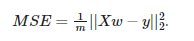

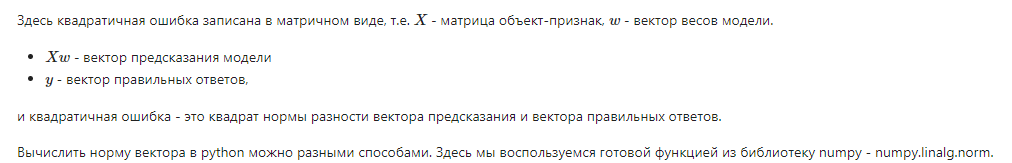

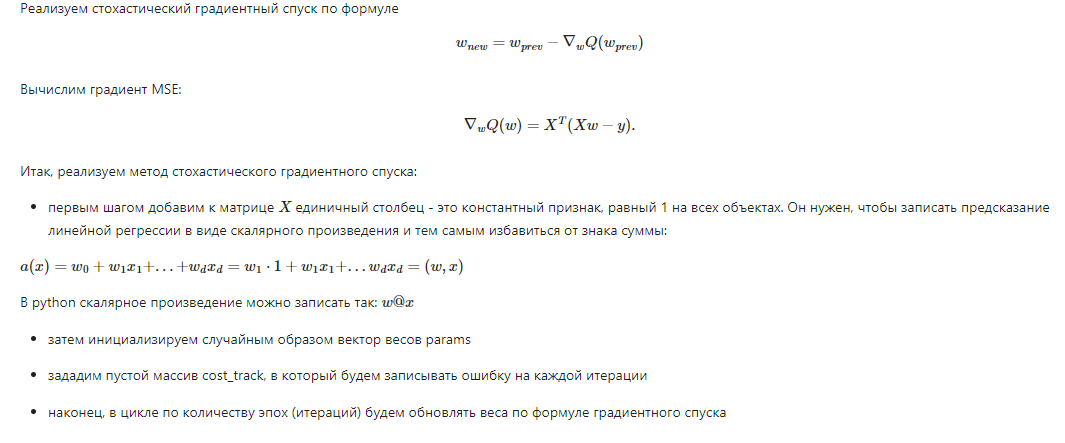

In [ ]:
def compute_cost(X, y, theta):
    m = len(y)

    cost = (1./m) * (np.linalg.norm(X @ theta - y) ** 2)
    return cost

In [ ]:
def stochastic_gradient_descent(X, y, learning_rate, iterations):

    X = np.hstack((np.ones((X.shape[0], 1)), X))
    params = np.random.rand(X.shape[1])

    m = X.shape[0]

    cost_track = np.zeros((iterations,1))

    for i in range(iterations):
        params = params - 2./m * learning_rate * (X.T @ ((X @ params) - y))
        cost_track[i] = compute_cost(X, y, params)

    return cost_track, params

In [ ]:
def predict(X, params):
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    return X @ params
     

In [ ]:
data=data.reshape((-1,1))
track, weights = stochastic_gradient_descent(data, target, 0.01, 100)

In [ ]:
weights

array([-0.15912293,  0.95319946])

In [ ]:
pred = predict(data,weights)


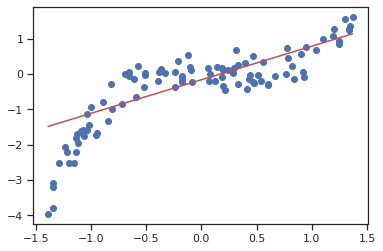

In [ ]:
plt.scatter(data, target)
plt.plot(data, pred, '-', c = 'r')

In [ ]:
track, weights = stochastic_gradient_descent(X_train, y_train, 0.01, 100)
pred = predict(X_train,weights)
track, weights1 = stochastic_gradient_descent(X_test, y_test, 0.01, 100)
pred1 = predict(X_test,weights1)

In [ ]:
print(f'''MSE loss: 
mse={mean_squared_error(y_train, pred)}
R2={r2_score(y_train, pred)}
''')

print(f'''MSE loss: 
mse={mean_squared_error(y_test, pred1)}
R2={r2_score(y_test, pred1)}
''')


MSE loss: 
mse=0.34697887040203607
R2=0.7110670236351324

MSE loss: 
mse=0.5777604525010547
R2=0.6071638383437197



In [ ]:
def create_polynomial_regression_model(degree):
  "Creates a polynomial regression model for the given degree"
  poly_features = PolynomialFeatures(degree=degree)
  
  # transform the features to higher degree features.
  X_train_poly = poly_features.fit_transform(X_train)
  
  # fit the transformed features to Linear Regression
  poly_model = LinearRegression()
  poly_model.fit(X_train_poly, y_train)
  
  # predicting on training data-set
  y_train_predicted = poly_model.predict(X_train_poly)
  
  # predicting on test data-set
  y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
  
  # evaluating the model on training dataset
  rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
  r2_train = r2_score(y_train, y_train_predicted)
  
  # evaluating the model on test dataset
  rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predict))
  r2_test = r2_score(y_test, y_test_predict)
  
  print("The model performance for the training set")
  print("-------------------------------------------")
  print("RMSE of training set is {}".format(rmse_train))
  print("R2 score of training set is {}".format(r2_train))
  
  print("\n")
  
  print("The model performance for the test set")
  print("-------------------------------------------")
  print("RMSE of test set is {}".format(rmse_test))
  print("R2 score of test set is {}".format(r2_test))
     


In [ ]:
create_polynomial_regression_model(2)

The model performance for the training set
-------------------------------------------
RMSE of training set is 0.5036022180605073
R2 score of training set is 0.7888119447183789


The model performance for the test set
-------------------------------------------
RMSE of test set is 0.6304388347905202
R2 score of test set is 0.7297600430136182


In [ ]:
create_polynomial_regression_model(3)

The model performance for the training set
-------------------------------------------
RMSE of training set is 0.2938427135733407
R2 score of training set is 0.9281008204745345


The model performance for the test set
-------------------------------------------
RMSE of test set is 0.2876337807105772
R2 score of test set is 0.9437472928963969


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import metrics

In [ ]:
# Doing a polynomial regression: Comparing linear, quadratic and cubic fits, upto degree 7
# Pipeline helps you associate two models or objects to be built sequentially with each other, 
mse = []
coeff = []
icpt = []
r2_score = []
degrees = [1, 2, 3, 4, 5, 6, 7]

for degree in degrees:
    pipeline = Pipeline([('poly_features', PolynomialFeatures(degree=degree)),
                     ('model', LinearRegression())])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_train)
    
    r2_score.append(metrics.r2_score(y_train, y_pred))
    mse.append(metrics.mean_squared_error(y_train, y_pred, squared=False))  
    coeff.append(pipeline.steps[1][1].coef_) 
    icpt.append(pipeline.steps[1][1].intercept_) 

In [ ]:
# respective coefficients/intercepts for different degrees
pd.set_option('display.max_colwidth', None)

param = pd.DataFrame(list(zip(degrees, coeff, icpt)), columns = ['degrees', 'Coefficients', 'Intercepts'])
param

,degrees,Coefficients,Intercepts
0,1,"[0.0, 1.1608266808311825]",-0.275668
1,2,"[0.0, 1.146415165608532, -0.4006881751348621]",-0.011783
2,3,"[0.0, -0.10625837171912778, -0.5079800986492359, 1.0181623179148052]",0.061390
3,4,"[0.0, -0.10039866326883382, -0.34517849575585224, 1.019200836453932, -0.0973279023107172]",0.033011
4,5,"[0.0, -0.07888964946055593, -0.34646301741025, 0.9671726310880769, -0.0969370070152054, 0.024034819996532848]",0.032351
5,6,"[0.0, -0.09124850861028436, -0.6658824419412872, 1.0048675405124547, 0.3961829642891452, 0.007727658827722601, -0.18528151494533962]",0.059616
6,7,"[0.0, -0.1651224764932513, -0.6639140117267722, 1.3778319387888924, 0.38278846159104357, -0.429032230502081, -0.17896685157096512, 0.14181984983071505]",0.062139


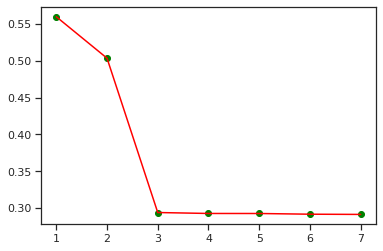

In [ ]:
    plt.scatter(degrees,mse, color="green")
    plt.plot(degrees,mse, color="red") 
     
    plt.show()

In [ ]:
r2 = pd.DataFrame(np.column_stack([degrees, r2_score, mse]), 
                               columns=['Degree', 'r2_score', 'MSE'])
r2

,Degree,r2_score,MSE
0,1.0,0.738923,0.559935
1,2.0,0.788812,0.503602
2,3.0,0.928101,0.293843
3,4.0,0.928727,0.292561
4,5.0,0.928746,0.292522
5,6.0,0.929214,0.291560
6,7.0,0.929355,0.291269


In [ ]:
steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', LinearRegression())
]

pipeline = Pipeline(steps)

pipeline.fit(X_train, y_train)

print('Training score: {}'.format(pipeline.score(X_train, y_train)))
print('Test score: {}'.format(pipeline.score(X_test, y_test)))

Training score: 0.7888119447183789
Test score: 0.7297600430136183


In [ ]:
steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=3)),
    ('model', LinearRegression())
]

pipeline = Pipeline(steps)

pipeline.fit(X_train, y_train)

print('Training score: {}'.format(pipeline.score(X_train, y_train)))
print('Test score: {}'.format(pipeline.score(X_test, y_test)))

Training score: 0.9281008204745345
Test score: 0.9437472928963969


In [ ]:
steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge(alpha=10, fit_intercept=True))
]

ridge_pipe = Pipeline(steps)
ridge_pipe.fit(X_train, y_train)

print('Training Score: {}'.format(ridge_pipe.score(X_train, y_train)))
print('Test Score: {}'.format(ridge_pipe.score(X_test, y_test)))

Training Score: 0.7784102439896052
Test Score: 0.7095480092322524


In [ ]:
steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=3)),
    ('model', Ridge(alpha=10, fit_intercept=True))
]

ridge_pipe = Pipeline(steps)
ridge_pipe.fit(X_train, y_train)

print('Training Score: {}'.format(ridge_pipe.score(X_train, y_train)))
print('Test Score: {}'.format(ridge_pipe.score(X_test, y_test)))

Training Score: 0.9228638026204262
Test Score: 0.9237993108211751


In [ ]:
steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Lasso(alpha=0.3, fit_intercept=True))
]

lasso_pipe = Pipeline(steps)

lasso_pipe.fit(X_train, y_train)

print('Training score: {}'.format(lasso_pipe.score(X_train, y_train)))
print('Test score: {}'.format(lasso_pipe.score(X_test, y_test)))

Training score: 0.6639789419781361
Test score: 0.5226657805316557


In [ ]:
steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=3)),
    ('model', Lasso(alpha=0.3, fit_intercept=True))
]

lasso_pipe = Pipeline(steps)

lasso_pipe.fit(X_train, y_train)

print('Training score: {}'.format(lasso_pipe.score(X_train, y_train)))
print('Test score: {}'.format(lasso_pipe.score(X_test, y_test)))

Training score: 0.8055070575606276
Test score: 0.7660116383998394


In [ ]:
def test_poly_model(degree=3):
    poly_model = Pipeline([('poly', PolynomialFeatures(degree=degree)),
                       ('linear', LinearRegression(fit_intercept=False))])
    poly_model.fit(X_train, y_train)
    poly_y_pred = poly_model.predict(X_test)
    

    fig = plt.figure(figsize=(10, 6))
    plt.plot( X_train, y_train,'g.')
    #plt.plot(data, y_array_regr, 'b', linewidth=2.0)
    plt.plot(X_test, poly_y_pred, 'ro')
    plt.show()
    
    print('Степени полинома - {}'.format(poly_model.named_steps['linear'].coef_))

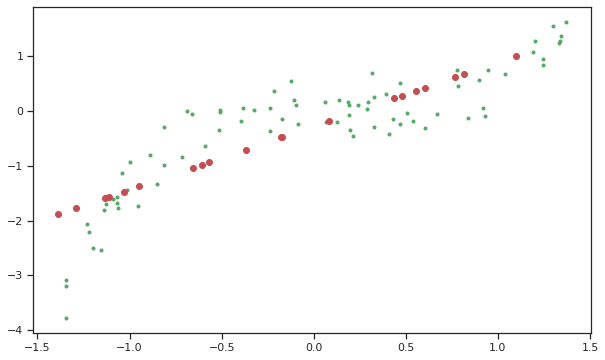

Степени полинома - [-0.27566756  1.16082668]


In [ ]:
test_poly_model(degree=1)

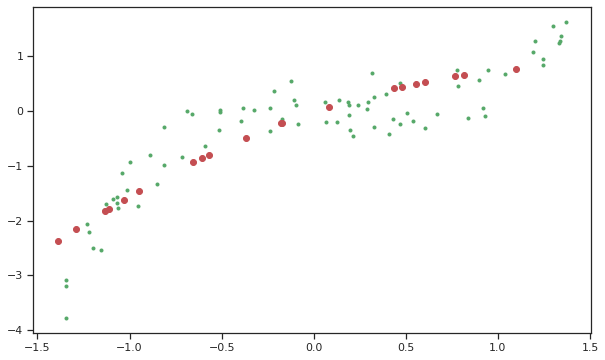

Степени полинома - [-0.01178342  1.14641517 -0.40068818]


In [ ]:
test_poly_model(degree=2)

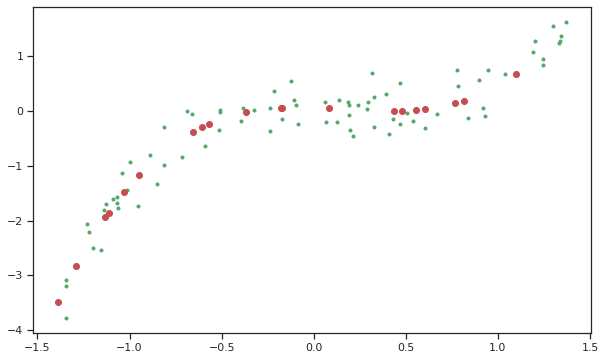

Степени полинома - [ 0.06138981 -0.10625837 -0.5079801   1.01816232]


In [ ]:
test_poly_model(degree=3)